In [1]:
import pandas as pd
import numpy as np
import uproot
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from ROOT import TCanvas, TGraphErrors, TGraph, gROOT
import ROOT
%jsroot on

Welcome to JupyROOT 6.22/06


In [2]:
folder = "/eos/user/n/nkasarag/Simulation_Full_HGCAL/rootFiles2/gitV08-08-00-v3/skimmed_root_files/"

sim = uproot.open("%s/test_pi0Info_8EnePoints_withoutProcessCuts_jan13.root"%folder)

lst = ["hit_lay", "hit_z", "hit_men", "genEn", "nSec", 'sec_pdgID', 'sec_charge', 'sec_kin', 'int_x', 'int_y', 'int_z', 'nparticle', 'particle_x', 'particle_y', 'particle_z', 'particle_pdgID', 'particle_charge', 'particle_kin', 'particle_process_id', 'particle_parent_id', 'particle_track_id']#, 'particle_creator_process']
df = sim["hits"].pandas.df( lst, flatten=False)#, entrystart=0, entrystop=10000)
df = df.loc[df.nSec>0]
df.head()

,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,nparticle,particle_x,particle_y,particle_z,particle_pdgID,particle_charge,particle_kin,particle_process_id,particle_parent_id,particle_track_id
entry,,,,,,,,,,,,,,,,,,,,,
0,"[2, 3, 4, 5, 6, 8, 8, 8, 8, 9, 10, 10, 11, 11,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 331...","[6.1870766, 1.3713822, 1.0965253, 1.240411, 1....",50.138855,27,"[1000822100.0, 1000290600.0, 11.0, -11.0, 331....","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0...","[7.5673092e-06, 3.5902125e-05, 0.020018108, 0....",-42.183807,84.073318,...,27,"[-42.183807, -42.183807, -42.183807, -48.65951...","[84.07332, 84.07332, 84.07332, 99.03735, 99.03...","[337.4088, 337.4088, 337.4088, 396.43896, 396....","[111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 221...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.49328655, 0.49770597, 4.2821054, 2.476305, ...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 201...","[0.0, 0.0, 0.0, 1.0, 1.0, 14339.0, 95.0, 11771...","[1.0, 1.0, 1.0, 95.0, 95.0, 14955.0, 11771.0, ..."
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,16,"[-87.44186, -87.44186, -87.44186, -87.44186, -...","[-31.374928, -31.374928, -31.374928, -31.37492...","[332.85376, 332.85376, 332.85376, 332.85376, 3...","[111.0, 221.0, 111.0, 221.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.475412, 18.521454, 0.40779084, 2.689623, 0....","[121.0, 121.0, 121.0, 201.0, 121.0, 201.0, 121...","[0.0, 0.0, 0.0, 1.0, 90.0, 1.0, 89.0, 12736.0,...","[1.0, 1.0, 1.0, 90.0, 2710.0, 89.0, 12736.0, 2..."
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,12,"[83.0961, 83.0961, 84.111435, 84.111435, 84.11...","[-33.463707, -33.463707, -33.796555, -33.79655...","[329.80566, 329.80566, 333.99463, 333.99463, 3...","[111.0, 111.0, 111.0, 111.0, 221.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.16702594, 1.4676828, 4.339945, 5.838872, 9....","[121.0, 121.0, 201.0, 201.0, 201.0, 121.0, 121...","[0.0, 0.0, 63.0, 63.0, 63.0, 1.0, 1.0, 62.0, 6...","[1.0, 1.0, 7455.0, 7455.0, 7455.0, 62.0, 62.0,..."
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,12,"[55.579365, 55.579365, 55.579365, 55.579365, 5...","[72.28778, 72.28778, 72.28778, 72.28778, 72.28...","[325.35626, 325.35626, 325.35626, 325.35626, 3...","[111.0, 221.0, 111.0, 111.0, 221.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.737165, 10.880251, 0.08019883, 0.8856001, 2...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 201...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 64.0, 64.0, 64...."
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,17,"[48.146538, 48.146538, 48.146538, 48.146538, 4...","[77.09083, 77.09083, 77.09083, 77.09083, 77.09...",

In [3]:
def ene_pi0(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==111.0])

def ene_n(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==2112.0])

def ene_p(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==2212.0])

def ene_gamma(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==22.0])

def ene_ele(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==11.0])

def ene_pos(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==-11.0])

def ene_pi_m(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==-211.0])

def ene_pi_p(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==211.0])

def ene_eta(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==221.0])



def ene_frac_abs(df_):
    return (df_.energyLostEE + df_.energyLostFH + df_.energyLostBH)/df_.genEn

def frac_ene_tot_sec(df_):
    return np.sum(df_.sec_kin)/df_.genEn

def frac_ene_pi0(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==111.0])/df_.genEn

def frac_ene_n(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==2112.0])/df_.genEn

def frac_ene_p(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==2212.0])/df_.genEn

def frac_ene_gamma(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==22.0])/df_.genEn

def frac_ene_ele(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==11.0])/df_.genEn

def frac_ene_pos(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==-11.0])/df_.genEn

def frac_ene_pi_m(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==-211.0])/df_.genEn

def frac_ene_pi_p(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==211.0])/df_.genEn

def frac_ene_eta(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==221.0])/df_.genEn

In [4]:
df["num_tot_sec"] = df.sec_pdgID.map(lambda x : x.size)
df["ene_tot_sec"] = df.sec_kin.map(lambda x : np.sum(x))
df["frac_ene_tot_sec"] = df.apply(frac_ene_tot_sec, axis=1)

df["num_pi0"] = df.sec_pdgID.map(lambda x : np.sum(x==111.0))
df["num_n"] = df.sec_pdgID.map(lambda x : np.sum(x==2112.0))
df["num_p"] = df.sec_pdgID.map(lambda x : np.sum(x==2212.0))
df["num_gamma"] = df.sec_pdgID.map(lambda x : np.sum(x==22.0))
df["num_ele"] = df.sec_pdgID.map(lambda x : np.sum(x==11.0))
df["num_pos"] = df.sec_pdgID.map(lambda x : np.sum(x==-11.0))
df["num_pi-"] = df.sec_pdgID.map(lambda x : np.sum(x==-211.0))
df["num_pi+"] = df.sec_pdgID.map(lambda x : np.sum(x==211.0))
df["num_eta"] = df.sec_pdgID.map(lambda x : np.sum(x==221.0))

df["ene_pi0"] = df.apply(ene_pi0, axis=1)
df["ene_n"] = df.apply(ene_n, axis=1)
df["ene_p"] = df.apply(ene_p, axis=1)
df["ene_gamma"] = df.apply(ene_gamma, axis=1)
df["ene_ele"] = df.apply(ene_ele, axis=1)
df["ene_pos"] = df.apply(ene_pos, axis=1)
df["ene_pi_m"] = df.apply(ene_pi_m, axis=1)
df["ene_pi_p"] = df.apply(ene_pi_p, axis=1)
df["ene_eta"] = df.apply(ene_eta, axis=1)


df["frac_ene_pi0"] = df.apply(frac_ene_pi0, axis=1)
df["frac_ene_n"] = df.apply(frac_ene_n, axis=1)
df["frac_ene_p"] = df.apply(frac_ene_p, axis=1)
df["frac_ene_gamma"] = df.apply(frac_ene_gamma, axis=1)
df["frac_ene_ele"] = df.apply(frac_ene_ele, axis=1)
df["frac_ene_pos"] = df.apply(frac_ene_pos, axis=1)
df["frac_ene_pi_m"] = df.apply(frac_ene_pi_m, axis=1)
df["frac_ene_pi_p"] = df.apply(frac_ene_pi_p, axis=1)
df["frac_ene_eta"] = df.apply(frac_ene_eta, axis=1)
df.head()

,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,ene_eta,frac_ene_pi0,frac_ene_n,frac_ene_p,frac_ene_gamma,frac_ene_ele,frac_ene_pos,frac_ene_pi_m,frac_ene_pi_p,frac_ene_eta
entry,,,,,,,,,,,,,,,,,,,,,
0,"[2, 3, 4, 5, 6, 8, 8, 8, 8, 9, 10, 10, 11, 11,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 331...","[6.1870766, 1.3713822, 1.0965253, 1.240411, 1....",50.138855,27,"[1000822100.0, 1000290600.0, 11.0, -11.0, 331....","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0...","[7.5673092e-06, 3.5902125e-05, 0.020018108, 0....",-42.183807,84.073318,...,0.000000,0.105170,0.001080,0.014083,0.007887,3.992534e-04,0.000636,0.696892,0.022266,0.000000
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,18.521454,0.177187,0.110799,0.006256,0.000213,7.802118e-07,0.000000,0.202187,0.002804,0.369435
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,0.000000,0.032604,0.022661,0.025393,0.000029,0.000000e+00,0.000000,0.457729,0.351295,0.000000
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,37.480690,0.158943,0.054732,0.002051,0.000205,0.000000e+00,0.000000,0.000000,0.000000,0.747539
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,0.000000,0.343641,0.030207,0.047815,0.000071,0.000000e+00,0.000000,0.332263,0.090031,0.000000


In [5]:
def maxKE(df_):
    return np.max(df_.sec_kin)

def lead_pi0(df_):
    pi0_ene = df_.sec_kin[df_.sec_pdgID==111.0]
    
    return 0 if pi0_ene.size==0 else np.max(pi0_ene) 

df["maxKE"] = df.apply(maxKE, axis=1)
df["lead_pi0"] = df.apply(lead_pi0, axis=1)
df.head()

,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,frac_ene_n,frac_ene_p,frac_ene_gamma,frac_ene_ele,frac_ene_pos,frac_ene_pi_m,frac_ene_pi_p,frac_ene_eta,maxKE,lead_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,"[2, 3, 4, 5, 6, 8, 8, 8, 8, 9, 10, 10, 11, 11,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 331...","[6.1870766, 1.3713822, 1.0965253, 1.240411, 1....",50.138855,27,"[1000822100.0, 1000290600.0, 11.0, -11.0, 331....","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0...","[7.5673092e-06, 3.5902125e-05, 0.020018108, 0....",-42.183807,84.073318,...,0.001080,0.014083,0.007887,3.992534e-04,0.000636,0.696892,0.022266,0.000000,34.623905,4.282105
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,0.110799,0.006256,0.000213,7.802118e-07,0.000000,0.202187,0.002804,0.369435,18.521454,8.475412
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,0.022661,0.025393,0.000029,0.000000e+00,0.000000,0.457729,0.351295,0.000000,22.901161,1.467683
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,0.054732,0.002051,0.000205,0.000000e+00,0.000000,0.000000,0.000000,0.747539,26.600437,4.737165
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,0.030207,0.047815,0.000071,0.000000e+00,0.000000,0.332263,0.090031,0.000000,12.598715,6.936474


In [6]:
def leading_pi_m_ene(df_):
    
    pi_m_lst = df_.sec_kin[df_.sec_pdgID==-211.0]
    
    if pi_m_lst.size==0:
        return 0
    else:
        return np.max(pi_m_lst)

def frac_ene_sec(df_):
    return (df_.Tot_kin - df_.leading_pi_m_ene)/df_.genEn

In [7]:
df["Tot_kin"] = df.sec_kin.map(lambda x : np.sum(x))
df["leading_pi_m_ene"] = df.apply(leading_pi_m_ene, axis=1)
df["frac_ene_sec"] = df.apply(frac_ene_sec, axis=1)

df

,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,frac_ene_ele,frac_ene_pos,frac_ene_pi_m,frac_ene_pi_p,frac_ene_eta,maxKE,lead_pi0,Tot_kin,leading_pi_m_ene,frac_ene_sec
entry,,,,,,,,,,,,,,,,,,,,,
0,"[2, 3, 4, 5, 6, 8, 8, 8, 8, 9, 10, 10, 11, 11,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 331...","[6.1870766, 1.3713822, 1.0965253, 1.240411, 1....",50.138855,27,"[1000822100.0, 1000290600.0, 11.0, -11.0, 331....","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0...","[7.5673092e-06, 3.5902125e-05, 0.020018108, 0....",-42.183807,84.073318,...,3.992534e-04,6.358149e-04,0.696892,0.022266,0.000000,34.623905,4.282105,48.137779,34.623905,0.269529
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,7.802118e-07,0.000000e+00,0.202187,0.002804,0.369435,18.521454,8.475412,47.703419,9.820814,0.755619
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,0.000000e+00,0.000000e+00,0.457729,0.351295,0.000000,22.901161,1.467683,48.091385,22.901161,0.502409
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.747539,26.600437,4.737165,48.335632,0.000000,0.964036
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,0.000000e+00,0.000000e+00,0.332263,0.090031,0.000000,12.598715,6.936474,46.826378,12.598715,0.682656
5,"[2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 16, 18, 19,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 333...","[2.0108209, 3.5060554, 1.1081952, 1.1188047, 1...",50.138912,25,"[1000822100.0, 11.0, -11.0, 1000822100.0, -211...","[82.0, -1.0, 1.0, 82.0, -1.0, 0.0, 0.0, 0.0, 1...","[1.7395882e-05, 0.008819183, 0.0052402895, 4.3...",90.666183,-38.845699,...,1.758950e-04,1.045154e-04,0.118980,0.476689,0.000000,22.983606,16.060318,48.702885,5.713727,0.857401
6,"[1, 2, 3, 4, 5, 6, 8, 9, 9, 10, 10, 10, 11, 11...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[1.4255904, 1.2390751, 1.9492519, 2.0617282, 1...",50.138603,23,"[1000822100.0, 1000290600.0, -211.0, 2212.0, 2...","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0....","[3.893218e-06, 6.2262043e-06, 0.3069419, 2.152...",87.998428,17.775108,...,0.000000e+00,0.000000e+00,0.081863,0.000000,0.040180,28.258490,28.258490,48.726074,3.797561,0.896086
7,"[2, 3, 3, 4, 5, 6, 6, 7, 7, 7, 8, 8, 9, 10, 10...","[3223.7, 3244.9, 3244.9, 3254.65, 3275.85, 328...","[1.0044984, 4.7632465, 4.0227866, 1.2321517, 1...",50.138870,32,"[1000822100.0, 111.0, 111.0, 2212.0, 211.0, 11...","[82.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, -1.0...","[1.682969e-05, 0.47099617, 0.348334, 0.732888,...",-70.565193,57.387402,...,0.000000e+00,0.000000e+00,0.105889,0.072562,0.000000,24.655874,9.156519,46.424217,3.379499,0.858510
8,"[2, 2, 3, 4, 4, 6, 7, 9, 10, 10, 11, 12, 12, 1...","[3223.7, 3223.7, 3244.9, 3254.65, 3254.65, 328...","[6.7381873, 1.2196797, 1.0870641, 3.587684, 1...

In [8]:

c=ROOT.TCanvas()

bins=80
xmin=0
xmax=80

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion",";Number of neutrons;Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1",";Number of neutrons;Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2",";Number of neutrons;Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z>320) & (df.int_z<360)].num_n.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z>320) & (df.int_z<360)].num_n.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z>320) & (df.int_z<360)].num_n.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/n_num_cee.pdf")

Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/n_num_cee.pdf has been created


In [9]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; Fraction of energy carried by neutrons;Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; Fraction of energy carried by neutrons;Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; Fraction of energy carried by neutrons;Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z>320) & (df.int_z<360)].frac_ene_n.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z>320) & (df.int_z<360)].frac_ene_n.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z>320) & (df.int_z<360)].frac_ene_n.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/n_f_cee_cee.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/n_f_cee_cee.pdf has been created


In [10]:

c=ROOT.TCanvas()

bins=40
xmin=0
xmax=40

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion",";Number of protons;Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1",";Number of protons;Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2",";Number of protons;Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].num_p.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].num_p.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].num_p.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [11]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; Fraction of energy carried by protons;Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; Fraction of energy carried by protons;Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; Fraction of energy carried by protons;Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_p.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_p.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_p.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [12]:

c=ROOT.TCanvas()

bins=20
xmin=0
xmax=20

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion",";Number of electron;Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1",";Number of electron;Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2",";Number of electron;Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].num_ele.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].num_ele.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].num_ele.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [13]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=0.25

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; Fraction of energy carried by electrons;Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; Fraction of energy carried by electrons;Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; Fraction of energy carried by electrons;Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_ele.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_ele.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_ele.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [14]:

c=ROOT.TCanvas()

bins=25
xmin=0
xmax=25

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion",";Number of #pi^{-};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1",";Number of #pi^{-};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2",";Number of #pi^{-};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi-"].values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi-"].values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi-"].values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion2.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [15]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; Fraction of energy carried by #pi^{-};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; Fraction of energy carried by #pi^{-};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; Fraction of energy carried by #pi^{-};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi_m.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi_m.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi_m.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [92]:

c=ROOT.TCanvas()

bins=25
xmin=0
xmax=25

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion",";Number of #pi^{+};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1",";Number of #pi^{+};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2",";Number of #pi^{+};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi+"].values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi+"].values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi+"].values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion2.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()




Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [54]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; Fraction of energy carried by #pi^{+};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; Fraction of energy carried by #pi^{+};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; Fraction of energy carried by #pi^{+};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi_p.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi_p.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi_p.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_f.pdf has been created


In [89]:

c=ROOT.TCanvas()

bins=25
xmin=0
xmax=25

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion",";Number of #pi^{0};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1",";Number of #pi^{0};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2",";Number of #pi^{0};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi0"].values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi0"].values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]["num_pi0"].values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion2.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [90]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; Fraction of energy carried by #pi^{0};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; Fraction of energy carried by #pi^{0};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; Fraction of energy carried by #pi^{0};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi0.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_ene_pi0.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [10]:
df_cleaned = df.loc[df.frac_ene_sec>0.4]
df_cleaned.head()

,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,frac_ene_ele,frac_ene_pos,frac_ene_pi_m,frac_ene_pi_p,frac_ene_eta,maxKE,lead_pi0,Tot_kin,leading_pi_m_ene,frac_ene_sec
entry,,,,,,,,,,,,,,,,,,,,,
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,7.802118e-07,0.000000,0.202187,0.002804,0.369435,18.521454,8.475412,47.703419,9.820814,0.755619
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,0.000000e+00,0.000000,0.457729,0.351295,0.000000,22.901161,1.467683,48.091385,22.901161,0.502409
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,0.000000e+00,0.000000,0.000000,0.000000,0.747539,26.600437,4.737165,48.335632,0.000000,0.964036
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,0.000000e+00,0.000000,0.332263,0.090031,0.000000,12.598715,6.936474,46.826378,12.598715,0.682656
5,"[2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 16, 18, 19,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 333...","[2.0108209, 3.5060554, 1.1081952, 1.1188047, 1...",50.138912,25,"[1000822100.0, 11.0, -11.0, 1000822100.0, -211...","[82.0, -1.0, 1.0, 82.0, -1.0, 0.0, 0.0, 0.0, 1...","[1.7395882e-05, 0.008819183, 0.0052402895, 4.3...",90.666183,-38.845699,...,1.758950e-04,0.000105,0.118980,0.476689,0.000000,22.983606,16.060318,48.702885,5.713727,0.857401


In [17]:

c=ROOT.TCanvas()

bins=100
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Shower start CE-E layer: 3-7 (20 GeV Pion); #pi^{0}_{f};Normalized Entries", bins,xmin,xmax)

e=20
df_req = df_cleaned.loc[(df_cleaned.genEn<e+2) & (df_cleaned.genEn>e-2) & (df_cleaned.int_z<331) & (df_cleaned.int_z>324)]
for i in range(df_req.frac_ene_pi0.size):
    
    if df_req.lead_pi0.values[i]>=df_req.maxKE.values[i]/2 :
        H_pion.Fill(df_req.frac_ene_pi0.values[i])

        


        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)

   

H_pion.DrawNormalized()



#H_pion3.GetYaxis().SetRangeUser(0,100000);

#ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [11]:
c=ROOT.TCanvas()

bins=100
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Shower start CE-E layer: 3-7 (100 GeV Pion); #pi^{0}_{f};Normalized Entries", bins,xmin,xmax)

e=100
df_req = df_cleaned.loc[(df_cleaned.genEn<e+2) & (df_cleaned.genEn>e-2) & (df_cleaned.int_z<331) & (df_cleaned.int_z>324)]
for i in range(df_req.frac_ene_pi0.size):
    
    if df_req.lead_pi0.values[i]>=df_req.maxKE.values[i]/2 :
        H_pion.Fill(df_req.frac_ene_pi0.values[i])

        


        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)

   

H_pion.DrawNormalized()



#H_pion3.GetYaxis().SetRangeUser(0,100000);

#ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [12]:
ene = np.array([ 20.0,  50.0,  80.0, 100.0, 120.0, 200.0, 250.0, 300.0])

In [45]:

mean_pi0_num = []
mean_p_num = []
mean_n_num = []
mean_gamma_num = []
mean_ele_num = []
mean_pos_num = []
mean_pi_m_num = []
mean_pi_p_num = []

df_dummy = df_cleaned.loc[(df_cleaned.int_z>320) & (df_cleaned.int_z<360)]

for e in ene:
    mean_pi0_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pi0.values))
    mean_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_p.values))
    mean_n_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df.genEn>e-2)].num_n.values))
    mean_gamma_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_gamma.values))
    mean_ele_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_ele.values))
    mean_pos_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pos.values))
    mean_pi_m_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi-"].values))
    mean_pi_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi+"].values))

In [46]:
mean_pi0_ene = []
mean_p_ene = []
mean_n_ene = []
mean_gamma_ene = []
mean_ele_ene = []
mean_pos_ene = []
mean_pi_m_ene = []
mean_pi_p_ene = []
mean_sec_ene = []
mean_tot_above_particles = []

df_dummy = df_cleaned.loc[(df_cleaned.int_z>320) & (df_cleaned.int_z<360)]
#df_dummy = df


for e in ene:
    
    df_ene = df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]
    
    mean_pi0_ene.append(np.mean(df_ene.ene_pi0.values))
    mean_p_ene.append(np.mean(df_ene.ene_p.values))
    mean_n_ene.append(np.mean(df_ene.ene_n.values))
    mean_gamma_ene.append(np.mean(df_ene.ene_gamma.values))
    mean_ele_ene.append(np.mean(df_ene.ene_ele.values))
    mean_pos_ene.append(np.mean(df_ene.ene_pos.values))
    mean_pi_m_ene.append(np.mean(df_ene.ene_pi_m.values))
    mean_pi_p_ene.append(np.mean(df_ene.ene_pi_p.values))
    
    mean_sec_ene.append(np.mean(df_ene.ene_tot_sec.values))
    
    mean_tot_above_particles.append(np.mean(np.array([df_ene.ene_pi0.values])+np.array([df_ene.ene_p.values])+np.array([df_ene.ene_n.values])+np.array([df_ene.ene_gamma.values])+np.array([df_ene.ene_ele.values])+np.array([df_ene.ene_pos.values])+np.array([df_ene.ene_pi_m.values])+np.array([df_ene.ene_pi_p.values])))
    

(-0.5, 14.0)

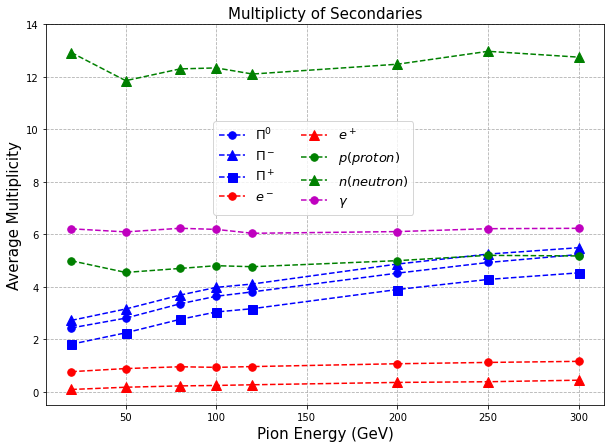

In [47]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_num, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_num, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_num, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_num, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_num, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_num, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_num, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_num, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.title("Multiplicty of Secondaries", fontsize=15)

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Average Multiplicity", fontsize=15)
#plt.xscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=13, ncol=2, loc=[0.3,0.5])
plt.ylim([-.5,14])

#plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/cee_particle_multiplycity.pdf")

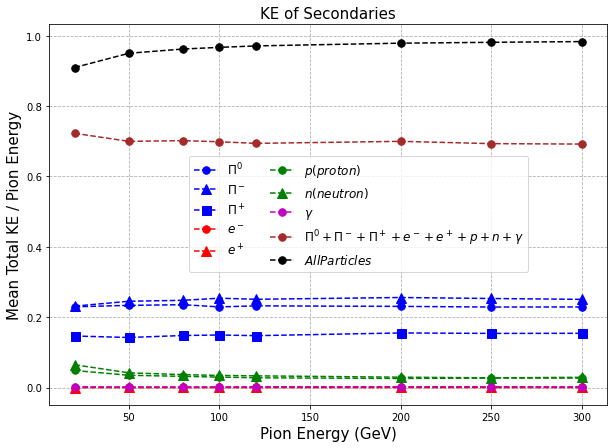

In [48]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_ene/ene, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_ene/ene, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_ene/ene, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_ene/ene, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_ene/ene, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_ene/ene, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_ene/ene, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_ene/ene, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.plot(ene, mean_tot_above_particles/ene, linestyle="--", markersize=15 , label = "$\Pi^0+\Pi^-+\Pi^++e^-+e^++p+n+\gamma$", color='brown', marker=".")
plt.plot(ene, mean_sec_ene/ene, ".k", linestyle="--", markersize=15 , label = "$All Particles$")



plt.title("KE of Secondaries", fontsize=15)

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Mean Total KE / Pion Energy", fontsize=15)
#plt.yscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=12, ncol=2, loc=[0.25,0.35])

#plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/cee_mean_ene.pdf")

In [49]:

mean_pi0_num = []
mean_p_num = []
mean_n_num = []
mean_gamma_num = []
mean_ele_num = []
mean_pos_num = []
mean_pi_m_num = []
mean_pi_p_num = []

df_dummy = df.loc[(df.int_z>320) & (df.int_z<360)]

for e in ene:
    mean_pi0_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pi0.values))
    mean_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_p.values))
    mean_n_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df.genEn>e-2)].num_n.values))
    mean_gamma_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_gamma.values))
    mean_ele_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_ele.values))
    mean_pos_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pos.values))
    mean_pi_m_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi-"].values))
    mean_pi_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi+"].values))

In [50]:
mean_pi0_ene = []
mean_p_ene = []
mean_n_ene = []
mean_gamma_ene = []
mean_ele_ene = []
mean_pos_ene = []
mean_pi_m_ene = []
mean_pi_p_ene = []
mean_sec_ene = []
mean_tot_above_particles = []

df_dummy = df.loc[(df.int_z>320) & (df.int_z<360)]
#df_dummy = df


for e in ene:
    
    df_ene = df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]
    
    mean_pi0_ene.append(np.mean(df_ene.ene_pi0.values))
    mean_p_ene.append(np.mean(df_ene.ene_p.values))
    mean_n_ene.append(np.mean(df_ene.ene_n.values))
    mean_gamma_ene.append(np.mean(df_ene.ene_gamma.values))
    mean_ele_ene.append(np.mean(df_ene.ene_ele.values))
    mean_pos_ene.append(np.mean(df_ene.ene_pos.values))
    mean_pi_m_ene.append(np.mean(df_ene.ene_pi_m.values))
    mean_pi_p_ene.append(np.mean(df_ene.ene_pi_p.values))
    
    mean_sec_ene.append(np.mean(df_ene.ene_tot_sec.values))
    
    mean_tot_above_particles.append(np.mean(np.array([df_ene.ene_pi0.values])+np.array([df_ene.ene_p.values])+np.array([df_ene.ene_n.values])+np.array([df_ene.ene_gamma.values])+np.array([df_ene.ene_ele.values])+np.array([df_ene.ene_pos.values])+np.array([df_ene.ene_pi_m.values])+np.array([df_ene.ene_pi_p.values])))
    

(-0.5, 14.0)

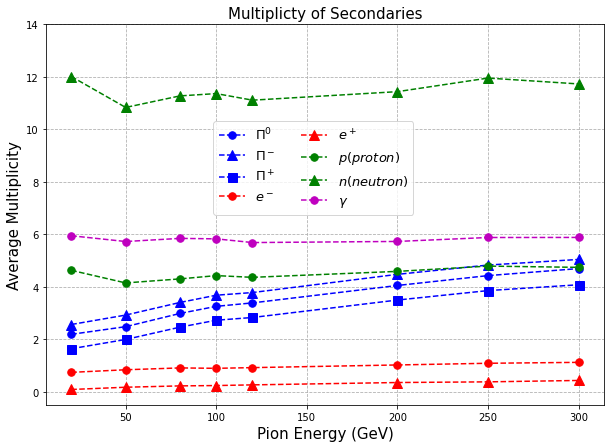

In [51]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_num, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_num, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_num, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_num, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_num, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_num, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_num, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_num, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.title("Multiplicty of Secondaries", fontsize=15)

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Average Multiplicity", fontsize=15)
#plt.xscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=13, ncol=2, loc=[0.3,0.5])
plt.ylim([-.5,14])

#plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/cee_particle_multiplycity.pdf")

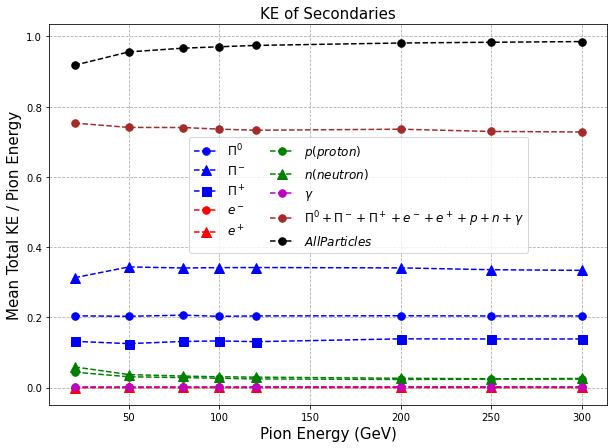

In [53]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_ene/ene, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_ene/ene, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_ene/ene, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_ene/ene, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_ene/ene, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_ene/ene, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_ene/ene, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_ene/ene, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.plot(ene, mean_tot_above_particles/ene, linestyle="--", markersize=15 , label = "$\Pi^0+\Pi^-+\Pi^++e^-+e^++p+n+\gamma$", color='brown', marker=".")
plt.plot(ene, mean_sec_ene/ene, ".k", linestyle="--", markersize=15 , label = "$All Particles$")



plt.title("KE of Secondaries", fontsize=15)

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Mean Total KE / Pion Energy", fontsize=15)
#plt.yscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=12, ncol=2, loc=[0.25,0.4])

#plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/cee_mean_ene.pdf")

In [17]:
ene = np.array([ 20.0,  50.0,  80.0, 100.0, 120.0, 200.0, 250.0, 300.0])

In [18]:
mean_pi0_num = []
mean_p_num = []
mean_n_num = []
mean_gamma_num = []
mean_ele_num = []
mean_pos_num = []
mean_pi_m_num = []
mean_pi_p_num = []

df_dummy = df

for e in ene:
    mean_pi0_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pi0.values))
    mean_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_p.values))
    mean_n_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df.genEn>e-2)].num_n.values))
    mean_gamma_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_gamma.values))
    mean_ele_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_ele.values))
    mean_pos_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pos.values))
    mean_pi_m_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi-"].values))
    mean_pi_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi+"].values))

In [19]:
mean_pi0_ene = []
mean_p_ene = []
mean_n_ene = []
mean_gamma_ene = []
mean_ele_ene = []
mean_pos_ene = []
mean_pi_m_ene = []
mean_pi_p_ene = []
mean_sec_ene = []
mean_tot_above_particles = []

df_dummy = df
#df_dummy = df


for e in ene:
    
    df_ene = df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]
    
    mean_pi0_ene.append(np.mean(df_ene.ene_pi0.values))
    mean_p_ene.append(np.mean(df_ene.ene_p.values))
    mean_n_ene.append(np.mean(df_ene.ene_n.values))
    mean_gamma_ene.append(np.mean(df_ene.ene_gamma.values))
    mean_ele_ene.append(np.mean(df_ene.ene_ele.values))
    mean_pos_ene.append(np.mean(df_ene.ene_pos.values))
    mean_pi_m_ene.append(np.mean(df_ene.ene_pi_m.values))
    mean_pi_p_ene.append(np.mean(df_ene.ene_pi_p.values))
    
    mean_sec_ene.append(np.mean(df_ene.ene_tot_sec.values))
    
    mean_tot_above_particles.append(np.mean(np.array([df_ene.ene_pi0.values])+np.array([df_ene.ene_p.values])+np.array([df_ene.ene_n.values])+np.array([df_ene.ene_gamma.values])+np.array([df_ene.ene_ele.values])+np.array([df_ene.ene_pos.values])+np.array([df_ene.ene_pi_m.values])+np.array([df_ene.ene_pi_p.values])))
    

(-0.5, 16.0)

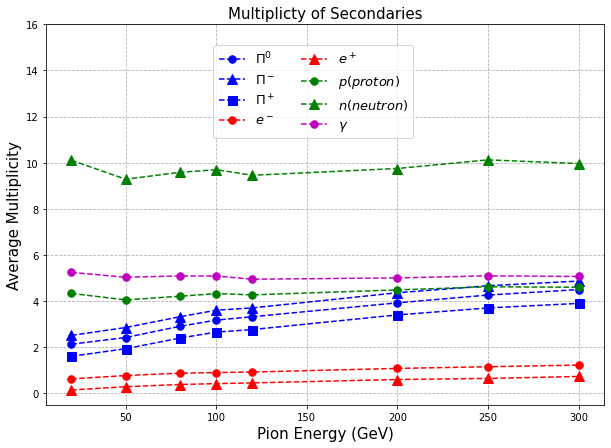

In [20]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_num, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_num, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_num, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_num, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_num, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_num, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_num, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_num, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.title("Multiplicty of Secondaries", fontsize=15)

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Average Multiplicity", fontsize=15)
#plt.xscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=13, ncol=2, loc=[0.3,0.7])
plt.ylim([-.5,16])

#plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/cee_particle_multiplycity.pdf")

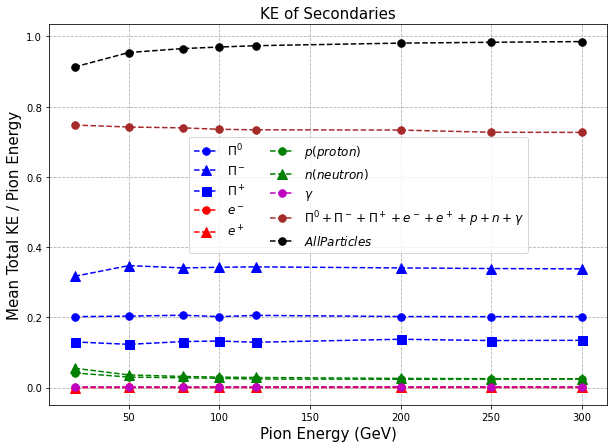

In [21]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_ene/ene, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_ene/ene, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_ene/ene, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_ene/ene, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_ene/ene, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_ene/ene, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_ene/ene, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_ene/ene, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.plot(ene, mean_tot_above_particles/ene, linestyle="--", markersize=15 , label = "$\Pi^0+\Pi^-+\Pi^++e^-+e^++p+n+\gamma$", color='brown', marker=".")
plt.plot(ene, mean_sec_ene/ene, ".k", linestyle="--", markersize=15 , label = "$All Particles$")



plt.title("KE of Secondaries", fontsize=15)

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Mean Total KE / Pion Energy", fontsize=15)
#plt.yscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=12, ncol=2, loc=[0.25,0.4])

#plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/cee_mean_ene.pdf")

In [22]:

c=ROOT.TCanvas()

bins=100
xmin=0
xmax=600

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized Entries", bins,xmin,xmax)

e=20
x = df.int_z.values
for i in range(x.size):
        H_pion.Fill(x[i])


        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)

   

H_pion.DrawNormalized()



#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [23]:
np.unique(np.concatenate((np.hstack(df.head(1000).hit_lay.values).reshape(-1,1), np.hstack(df.head(1000).hit_z.values).reshape(-1,1)), axis=1), axis=0)

array([[1.00000000e+00, 3.21394995e+03],
       [2.00000000e+00, 3.22369995e+03],
       [3.00000000e+00, 3.24489990e+03],
       [4.00000000e+00, 3.25464990e+03],
       [5.00000000e+00, 3.27585010e+03],
       [6.00000000e+00, 3.28560010e+03],
       [7.00000000e+00, 3.30680005e+03],
       [8.00000000e+00, 3.31655005e+03],
       [9.00000000e+00, 3.33775000e+03],
       [1.00000000e+01, 3.34750000e+03],
       [1.10000000e+01, 3.36869995e+03],
       [1.20000000e+01, 3.37844995e+03],
       [1.30000000e+01, 3.39964990e+03],
       [1.40000000e+01, 3.40939990e+03],
       [1.50000000e+01, 3.43060010e+03],
       [1.60000000e+01, 3.44035010e+03],
       [1.70000000e+01, 3.46155005e+03],
       [1.80000000e+01, 3.47130005e+03],
       [1.90000000e+01, 3.49552002e+03],
       [2.00000000e+01, 3.50527002e+03],
       [2.10000000e+01, 3.52948999e+03],
       [2.20000000e+01, 3.53923999e+03],
       [2.30000000e+01, 3.56345996e+03],
       [2.40000000e+01, 3.57320996e+03],
       [2.500000

In [24]:
mean_pi0_num = []
mean_p_num = []
mean_n_num = []
mean_gamma_num = []
mean_ele_num = []
mean_pos_num = []
mean_pi_m_num = []
mean_pi_p_num = []

df_dummy = df.loc[(df.int_z>320) & (df.int_z<360)]

for e in ene:
    mean_pi0_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pi0.values))
    mean_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_p.values))
    mean_n_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df.genEn>e-2)].num_n.values))
    mean_gamma_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_gamma.values))
    mean_ele_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_ele.values))
    mean_pos_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pos.values))
    mean_pi_m_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi-"].values))
    mean_pi_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi+"].values))

In [25]:
mean_pi0_ene = []
mean_p_ene = []
mean_n_ene = []
mean_gamma_ene = []
mean_ele_ene = []
mean_pos_ene = []
mean_pi_m_ene = []
mean_pi_p_ene = []
mean_sec_ene = []
mean_tot_above_particles = []

df_dummy = df.loc[(df.int_z>320) & (df.int_z<360)]
#df_dummy = df


for e in ene:
    
    df_ene = df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]
    
    mean_pi0_ene.append(np.mean(df_ene.ene_pi0.values))
    mean_p_ene.append(np.mean(df_ene.ene_p.values))
    mean_n_ene.append(np.mean(df_ene.ene_n.values))
    mean_gamma_ene.append(np.mean(df_ene.ene_gamma.values))
    mean_ele_ene.append(np.mean(df_ene.ene_ele.values))
    mean_pos_ene.append(np.mean(df_ene.ene_pos.values))
    mean_pi_m_ene.append(np.mean(df_ene.ene_pi_m.values))
    mean_pi_p_ene.append(np.mean(df_ene.ene_pi_p.values))
    
    mean_sec_ene.append(np.mean(df_ene.ene_tot_sec.values))
    
    mean_tot_above_particles.append(np.mean(np.array([df_ene.ene_pi0.values])+np.array([df_ene.ene_p.values])+np.array([df_ene.ene_n.values])+np.array([df_ene.ene_gamma.values])+np.array([df_ene.ene_ele.values])+np.array([df_ene.ene_pos.values])+np.array([df_ene.ene_pi_m.values])+np.array([df_ene.ene_pi_p.values])))
    

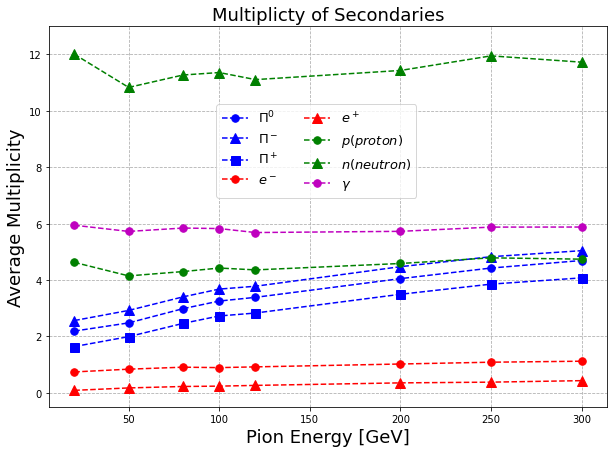

In [70]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_num, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_num, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_num, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_num, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_num, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_num, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_num, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_num, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.title("Multiplicty of Secondaries", fontsize=18)

plt.xlabel("Pion Energy [GeV]", fontsize=18)
plt.ylabel("Average Multiplicity", fontsize=18)
#plt.xscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=13, ncol=2, loc=[0.3,0.55])
plt.ylim([-.5,13])

plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/cee_particle_multiplycity.pdf")

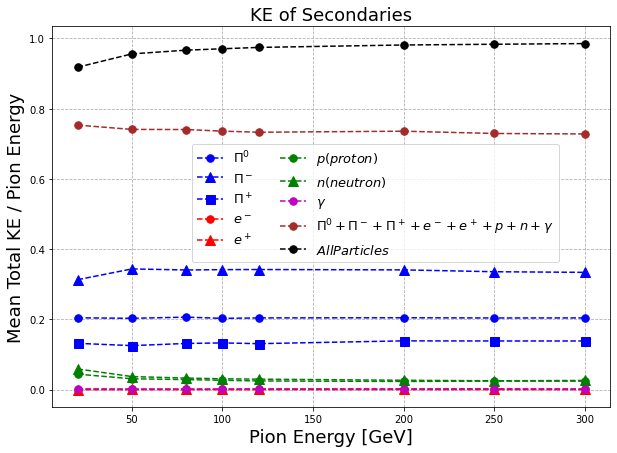

In [71]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_ene/ene, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_ene/ene, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_ene/ene, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_ene/ene, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_ene/ene, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_ene/ene, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_ene/ene, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_ene/ene, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.plot(ene, mean_tot_above_particles/ene, linestyle="--", markersize=15 , label = "$\Pi^0+\Pi^-+\Pi^++e^-+e^++p+n+\gamma$", color='brown', marker=".")
plt.plot(ene, mean_sec_ene/ene, ".k", linestyle="--", markersize=15 , label = "$All Particles$")



plt.title("KE of Secondaries", fontsize=18)

plt.xlabel("Pion Energy [GeV]", fontsize=18)
plt.ylabel("Mean Total KE / Pion Energy", fontsize=18)
#plt.yscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=13, ncol=2, loc=[0.25,0.38])

plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/cee_mean_ene.pdf")

In [72]:
mean_pi0_num = []
mean_p_num = []
mean_n_num = []
mean_gamma_num = []
mean_ele_num = []
mean_pos_num = []
mean_pi_m_num = []
mean_pi_p_num = []

df_dummy = df.loc[(df.int_z>370) & (df.int_z<512)]

for e in ene:
    mean_pi0_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pi0.values))
    mean_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_p.values))
    mean_n_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df.genEn>e-2)].num_n.values))
    mean_gamma_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_gamma.values))
    mean_ele_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_ele.values))
    mean_pos_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)].num_pos.values))
    mean_pi_m_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi-"].values))
    mean_pi_p_num.append(np.mean(df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]["num_pi+"].values))

In [73]:
mean_pi0_ene = []
mean_p_ene = []
mean_n_ene = []
mean_gamma_ene = []
mean_ele_ene = []
mean_pos_ene = []
mean_pi_m_ene = []
mean_pi_p_ene = []
mean_sec_ene = []
mean_tot_above_particles = []

df_dummy = df.loc[(df.int_z>370) & (df.int_z<512)]
#df_dummy = df


for e in ene:
    
    df_ene = df_dummy.loc[(df_dummy.genEn<e+2) & (df_dummy.genEn>e-2)]
    
    mean_pi0_ene.append(np.mean(df_ene.ene_pi0.values))
    mean_p_ene.append(np.mean(df_ene.ene_p.values))
    mean_n_ene.append(np.mean(df_ene.ene_n.values))
    mean_gamma_ene.append(np.mean(df_ene.ene_gamma.values))
    mean_ele_ene.append(np.mean(df_ene.ene_ele.values))
    mean_pos_ene.append(np.mean(df_ene.ene_pos.values))
    mean_pi_m_ene.append(np.mean(df_ene.ene_pi_m.values))
    mean_pi_p_ene.append(np.mean(df_ene.ene_pi_p.values))
    
    mean_sec_ene.append(np.mean(df_ene.ene_tot_sec.values))
    
    mean_tot_above_particles.append(np.mean(np.array([df_ene.ene_pi0.values])+np.array([df_ene.ene_p.values])+np.array([df_ene.ene_n.values])+np.array([df_ene.ene_gamma.values])+np.array([df_ene.ene_ele.values])+np.array([df_ene.ene_pos.values])+np.array([df_ene.ene_pi_m.values])+np.array([df_ene.ene_pi_p.values])))
    

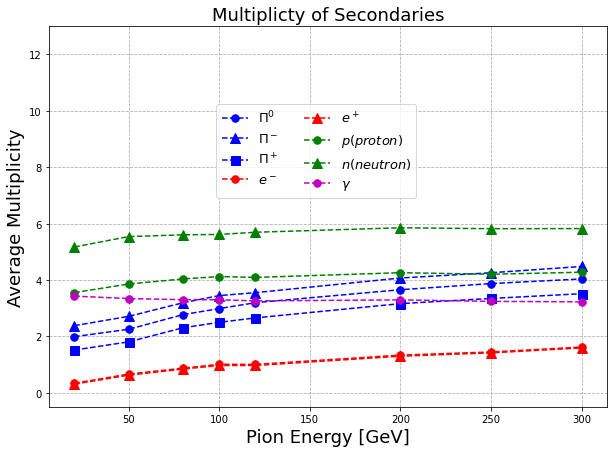

In [74]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_num, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_num, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_num, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_num, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_num, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_num, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_num, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_num, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.title("Multiplicty of Secondaries", fontsize=18)

plt.xlabel("Pion Energy [GeV]", fontsize=18)
plt.ylabel("Average Multiplicity", fontsize=18)
#plt.xscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=13, ncol=2, loc=[0.3,0.55])
plt.ylim([-.5,13])

plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/ceh_ahcal_particle_multiplycity.pdf")

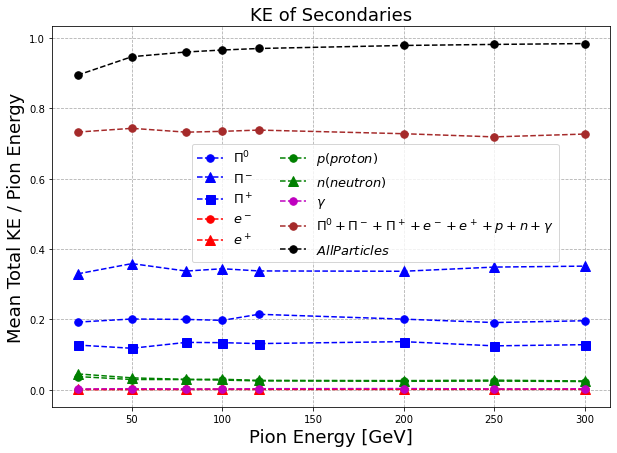

In [75]:
plt.figure(figsize=[10,7])

plt.plot(ene, mean_pi0_ene/ene, ".b", linestyle="--", markersize=15 , label = "$\Pi^0$")
plt.plot(ene, mean_pi_m_ene/ene, "^b", linestyle="--", markersize=10 , label = "$\Pi^-$")
plt.plot(ene, mean_pi_p_ene/ene, "sb", linestyle="--", markersize=9 , label = "$\Pi^+$")

plt.plot(ene, mean_ele_ene/ene, ".r", linestyle="--", markersize=15 , label = "$e^-$")
plt.plot(ene, mean_pos_ene/ene, "^r", linestyle="--", markersize=10 , label = "$e^+$")

plt.plot(ene, mean_p_ene/ene, ".g", linestyle="--", markersize=15 , label = "$p(proton)$")
plt.plot(ene, mean_n_ene/ene, "^g", linestyle="--", markersize=10 , label = "$n(neutron)$")

plt.plot(ene, mean_gamma_ene/ene, ".m", linestyle="--", markersize=15 , label = "$\gamma$")

plt.plot(ene, mean_tot_above_particles/ene, linestyle="--", markersize=15 , label = "$\Pi^0+\Pi^-+\Pi^++e^-+e^++p+n+\gamma$", color='brown', marker=".")
plt.plot(ene, mean_sec_ene/ene, ".k", linestyle="--", markersize=15 , label = "$All Particles$")



plt.title("KE of Secondaries", fontsize=18)

plt.xlabel("Pion Energy [GeV]", fontsize=18)
plt.ylabel("Mean Total KE / Pion Energy", fontsize=18)
#plt.yscale("log")
plt.grid(linestyle="--")
plt.legend(fontsize=13, ncol=2, loc=[0.25,0.38])

plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/ceh_ahcal_mean_ene.pdf")

In [76]:
def kin_sum_pi0_frac(df_):
    return np.sum(df_.particle_kin[np.logical_and(df_.particle_pdgID==111.0, df_.particle_process_id>=121)])/df_.genEn

In [77]:
df["kin_sum_pi0_frac"] = df.apply(kin_sum_pi0_frac, axis=1)

df = df.loc[df.kin_sum_pi0_frac<=1]

df.head()

,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,frac_ene_pos,frac_ene_pi_m,frac_ene_pi_p,frac_ene_eta,maxKE,lead_pi0,Tot_kin,leading_pi_m_ene,frac_ene_sec,kin_sum_pi0_frac
entry,,,,,,,,,,,,,,,,,,,,,
0,"[2, 3, 4, 5, 6, 8, 8, 8, 8, 9, 10, 10, 11, 11,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 331...","[6.1870766, 1.3713822, 1.0965253, 1.240411, 1....",50.138855,27,"[1000822100.0, 1000290600.0, 11.0, -11.0, 331....","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0...","[7.5673092e-06, 3.5902125e-05, 0.020018108, 0....",-42.183807,84.073318,...,0.000636,0.696892,0.022266,0.000000,34.623905,4.282105,48.137779,34.623905,0.269529,0.415509
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,0.000000,0.202187,0.002804,0.369435,18.521454,8.475412,47.703419,9.820814,0.755619,0.538043
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,0.000000,0.457729,0.351295,0.000000,22.901161,1.467683,48.091385,22.901161,0.502409,0.327513
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,0.000000,0.000000,0.000000,0.747539,26.600437,4.737165,48.335632,0.000000,0.964036,0.912183
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,0.000000,0.332263,0.090031,0.000000,12.598715,6.936474,46.826378,12.598715,0.682656,0.439242


In [78]:
def frac_first_ene_pi0_firstHadInt(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==111.0])/df_.genEn

def frac_first_ene_pi0(df_):  
    
    bool_pdgID = (df_.particle_pdgID==111.0)
    bool_parent_id = (df_.particle_parent_id<=0)
    bool_process_id = df_.particle_process_id>=121
    
    and_bool = bool_pdgID*bool_parent_id*bool_process_id
    
    return np.sum(df_.particle_kin[and_bool])/df_.genEn
    
def frac_rest_ene_pi0(df_):  
    
    bool_pdgID = (df_.particle_pdgID==111.0)
    bool_parent_id = (df_.particle_parent_id>0)
    bool_process_id = df_.particle_process_id>=121
    
    and_bool = bool_pdgID*bool_parent_id*bool_process_id
    
    return np.sum(df_.particle_kin[and_bool])/df_.genEn

In [79]:
df["frac_first_ene_pi0_firstHadInt"] = df.apply(frac_first_ene_pi0_firstHadInt, axis=1)
df["frac_first_ene_pi0"] = df.apply(frac_first_ene_pi0, axis=1)
df["frac_rest_ene_pi0"] = df.apply(frac_rest_ene_pi0, axis=1)



df.head()

/usr/local/bin/start_ipykernel.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/bin/start_ipykernel.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/bin/start_ipykernel.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,frac_ene_eta,maxKE,lead_pi0,Tot_kin,leading_pi_m_ene,frac_ene_sec,kin_sum_pi0_frac,frac_first_ene_pi0_firstHadInt,frac_first_ene_pi0,frac_rest_ene_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,"[2, 3, 4, 5, 6, 8, 8, 8, 8, 9, 10, 10, 11, 11,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 331...","[6.1870766, 1.3713822, 1.0965253, 1.240411, 1....",50.138855,27,"[1000822100.0, 1000290600.0, 11.0, -11.0, 331....","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0...","[7.5673092e-06, 3.5902125e-05, 0.020018108, 0....",-42.183807,84.073318,...,0.000000,34.623905,4.282105,48.137779,34.623905,0.269529,0.415509,0.105170,0.105170,0.310339
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,0.369435,18.521454,8.475412,47.703419,9.820814,0.755619,0.538043,0.177187,0.177187,0.360856
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,0.000000,22.901161,1.467683,48.091385,22.901161,0.502409,0.327513,0.032604,0.032604,0.294910
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,0.747539,26.600437,4.737165,48.335632,0.000000,0.964036,0.912183,0.158943,0.158943,0.753240
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,0.000000,12.598715,6.936474,46.826378,12.598715,0.682656,0.439242,0.343641,0.343641,0.095601


In [80]:
def bool_all_pi0(df_):
    bool_sum = np.sum(df_.particle_pdgID==111.0)
        
    if bool_sum>0:
        return 1
    
    else:
        return 0

def bool_first_pi0(df_):
    bool_sum = np.sum(np.logical_and(df_.particle_pdgID==111.0, df_.particle_parent_id<=0))
        
    if bool_sum>0:
        return 1
    
    else:
        return 0
    
def bool_late_pi0(df_):  
    bool_sum = np.sum(np.logical_and(df_.particle_pdgID==111.0, df_.particle_parent_id>0))
        
    if bool_sum>0:
        return 1
    
    else:
        return 0

In [81]:
df["bool_all_pi0"] = df.apply(bool_all_pi0, axis=1)
df["bool_first_pi0"] = df.apply(bool_first_pi0, axis=1)
df["bool_late_pi0"] = df.apply(bool_late_pi0, axis=1)
df.head()

/usr/local/bin/start_ipykernel.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/bin/start_ipykernel.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/bin/start_ipykernel.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,Tot_kin,leading_pi_m_ene,frac_ene_sec,kin_sum_pi0_frac,frac_first_ene_pi0_firstHadInt,frac_first_ene_pi0,frac_rest_ene_pi0,bool_all_pi0,bool_first_pi0,bool_late_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,"[2, 3, 4, 5, 6, 8, 8, 8, 8, 9, 10, 10, 11, 11,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 331...","[6.1870766, 1.3713822, 1.0965253, 1.240411, 1....",50.138855,27,"[1000822100.0, 1000290600.0, 11.0, -11.0, 331....","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0...","[7.5673092e-06, 3.5902125e-05, 0.020018108, 0....",-42.183807,84.073318,...,48.137779,34.623905,0.269529,0.415509,0.105170,0.105170,0.310339,1,1,1
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,47.703419,9.820814,0.755619,0.538043,0.177187,0.177187,0.360856,1,1,1
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,48.091385,22.901161,0.502409,0.327513,0.032604,0.032604,0.294910,1,1,1
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,48.335632,0.000000,0.964036,0.912183,0.158943,0.158943,0.753240,1,1,1
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,46.826378,12.598715,0.682656,0.439242,0.343641,0.343641,0.095601,1,1,1


In [82]:
def bool_only_pi0_f(df_):
    return 1 if (df_.bool_first_pi0==1 and df_.bool_late_pi0==0) else 0

def bool_only_pi0_l(df_):
    return 1 if (df_.bool_first_pi0==0 and df_.bool_late_pi0==1) else 0

def bool_both_pi0_f_l(df_):
    return 1 if (df_.bool_first_pi0==1 and df_.bool_late_pi0==1) else 0

df["bool_only_pi0_f"] = df.apply(bool_only_pi0_f, axis=1)
df["bool_only_pi0_l"] = df.apply(bool_only_pi0_l, axis=1)
df["bool_both_pi0_f_l"] = df.apply(bool_both_pi0_f_l, axis=1)
df.head()

/usr/local/bin/start_ipykernel.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/start_ipykernel.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/start_ipykernel.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,hit_lay,hit_z,hit_men,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,...,kin_sum_pi0_frac,frac_first_ene_pi0_firstHadInt,frac_first_ene_pi0,frac_rest_ene_pi0,bool_all_pi0,bool_first_pi0,bool_late_pi0,bool_only_pi0_f,bool_only_pi0_l,bool_both_pi0_f_l
entry,,,,,,,,,,,,,,,,,,,,,
0,"[2, 3, 4, 5, 6, 8, 8, 8, 8, 9, 10, 10, 11, 11,...","[3223.7, 3244.9, 3254.65, 3275.85, 3285.6, 331...","[6.1870766, 1.3713822, 1.0965253, 1.240411, 1....",50.138855,27,"[1000822100.0, 1000290600.0, 11.0, -11.0, 331....","[82.0, 29.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 0...","[7.5673092e-06, 3.5902125e-05, 0.020018108, 0....",-42.183807,84.073318,...,0.415509,0.105170,0.105170,0.310339,1,1,1,0,0,1
1,"[1, 2, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, ...","[3213.95, 3223.7, 3244.9, 3254.65, 3275.85, 32...","[5.19909, 1.2172235, 3.095806, 3.0689235, 1.75...",50.134537,45,"[2112.0, -211.0, 111.0, 221.0, 331.0, -211.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 1.0...","[5.4083405, 9.820814, 8.475412, 18.521454, 4.1...",-87.441856,-31.374928,...,0.538043,0.177187,0.177187,0.360856,1,1,1,0,0,1
2,"[2, 3, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, ...","[3223.7, 3244.9, 3244.9, 3244.9, 3254.65, 3275...","[1.1060953, 1.497224, 2.2858703, 1.8524911, 1....",50.138893,51,"[130.0, -211.0, 2212.0, 111.0, 211.0, -211.0, ...","[0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0...","[3.0072129, 0.04886943, 0.84819925, 0.16702594...",83.096100,-33.463707,...,0.327513,0.032604,0.032604,0.294910,1,1,1,0,0,1
3,"[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3223.7, 3223.7, 3244.9, 324...","[1.0763191, 1.9097342, 1.6734657, 4.1025305, 3...",50.138805,23,"[2112.0, 2112.0, 111.0, 221.0, 111.0, 111.0, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06796418, 0.061084848, 4.737165, 10.880251,...",55.579365,72.287781,...,0.912183,0.158943,0.158943,0.753240,1,1,1,0,0,1
4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 6, ...","[3213.95, 3213.95, 3213.95, 3213.95, 3213.95, ...","[1.4177569, 4.2015424, 2.2686186, 1.8128102, 4...",50.138943,50,"[211.0, -211.0, -211.0, 111.0, 111.0, -211.0, ...","[1.0, -1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[0.40863743, 1.0428871, 12.598715, 5.3198323, ...",48.146538,77.090828,...,0.439242,0.343641,0.343641,0.095601,1,1,1,0,0,1


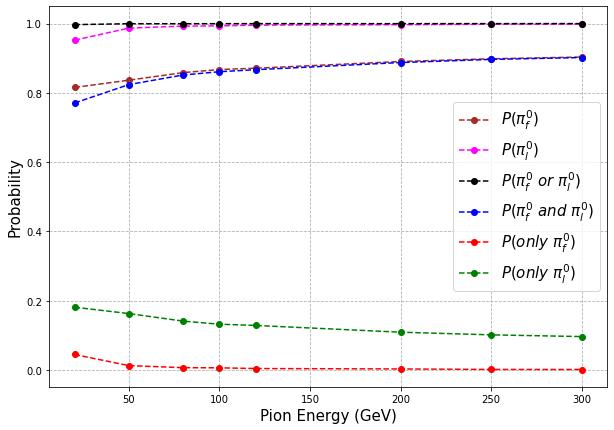

In [83]:
ene = [20, 50, 80, 100, 120, 200, 250, 300]

pi0_prob_all = []
pi0_prob_first = []
pi0_prob_late = []
bool_only_pi0_f = []
bool_only_pi0_l = []
bool_both_pi0_f_l = []

for e in ene:
    pi0_prob_all.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_all_pi0.values))
    pi0_prob_first.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_first_pi0.values))
    pi0_prob_late.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_late_pi0.values))
    bool_only_pi0_f.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_only_pi0_f.values))
    bool_only_pi0_l.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_only_pi0_l.values))
    bool_both_pi0_f_l.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_both_pi0_f_l.values))
    
plt.figure(figsize=[10,7])

plt.plot(ene, pi0_prob_first, ".b", markersize=12, color="brown",linestyle="--", label="$P(\pi^{0}_{f})$")
plt.plot(ene, pi0_prob_late, ".g", markersize=12, color="magenta", linestyle="--", label="$P(\pi^{0}_{l})$")

plt.plot(ene, pi0_prob_all, ".b", markersize=12, color="black", linestyle="--", label="$P(\pi^{0}_{f} \ or \ \pi^{0}_{l})$" )
plt.plot(ene, bool_both_pi0_f_l, ".g", markersize=12, color="blue", linestyle="--", label="$P(\pi^{0}_{f} \ and \ \pi^{0}_{l})$")

plt.plot(ene, bool_only_pi0_f, ".b", markersize=12, color="red", linestyle="--", label="$P(only \ \pi^{0}_{f})$" )
plt.plot(ene, bool_only_pi0_l, ".b", markersize=12, color="green",linestyle="--", label="$P(only \ \pi^{0}_{l})$")

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Probability", fontsize=15)

plt.grid(linestyle="--")
plt.legend(fontsize=15)
#plt.xscale("log")

In [84]:
e=100

In [85]:
df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values.size

8991

In [86]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; #pi^{0}_{frac_firstHad};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; #pi^{0}_{f};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")

H_pion1.SetStats(0);
H_pion.SetStats(0);
H_pion2.SetStats(0);

#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();
#c.Update()
ROOT.gStyle.SetOptStat(0);


#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_f.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_f.pdf has been created


In [63]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} created in later part of pion shower; #pi^{0}_{l};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} created in rest of pion shower; #pi^{0}_{frac_rest};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} created in rest of pion shower; #pi^{0}_{frac_rest};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; #pi^{0}_{l};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; #pi^{0}_{frac_rest};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; #pi^{0}_{frac_rest};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
   
    
H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion2.DrawNormalized("same")



#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();



#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_l.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_l.pdf has been created


In [85]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
#H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized to unit area", bins,xmin,xmax)
#H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized to unit area", bins,xmin,xmax)
#H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all};Normalized to unit area", bins,xmin,xmax)

H_pion = ROOT.TH1F("H_pion","; #pi^{0}_{all_frac};Normalized to unit area", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","; #pi^{0}_{all_frac};Normalized to unit area", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","; #pi^{0}_{all};Normalized to unit area", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)

H_pion2.GetXaxis().SetTitleSize(0.045)

H_pion2.GetYaxis().SetTitleSize(0.045)
H_pion2.GetYaxis().SetTitleOffset(1.1) 

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")


#H_pion3.GetYaxis().SetRangeUser(0,100000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend(0.6,0.7,0.88,0.88);
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_all.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_all.pdf has been created


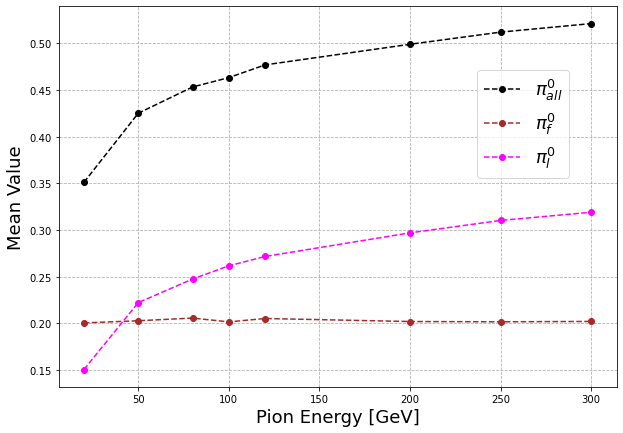

In [71]:
ene = [20, 50, 80, 100, 120, 200, 250, 300]

pi0_frac_all = []
pi0_frac_first = []
pi0_frac_late = []

for e in ene:
    pi0_frac_all.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values))
    pi0_frac_first.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values))
    pi0_frac_late.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values))
    
plt.figure(figsize=[10,7])

plt.plot(ene, pi0_frac_all, ".b", markersize=12, color="black", linestyle="--", label="$\pi^{0}_{all}$" )
plt.plot(ene, pi0_frac_first, ".b", markersize=12, color="brown",linestyle="--", label="$\pi^{0}_{f}$")
plt.plot(ene, pi0_frac_late, ".g", markersize=12, color="magenta", linestyle="--", label="$\pi^{0}_{l}$")

plt.xlabel("Pion Energy [GeV]", fontsize=18)
plt.ylabel("Mean Value", fontsize=18)

plt.grid(linestyle="--")
plt.legend(fontsize=18, loc=[0.75,0.55])
#plt.xscale("log")

plt.savefig("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_diff_cato_vs_ene.pdf")

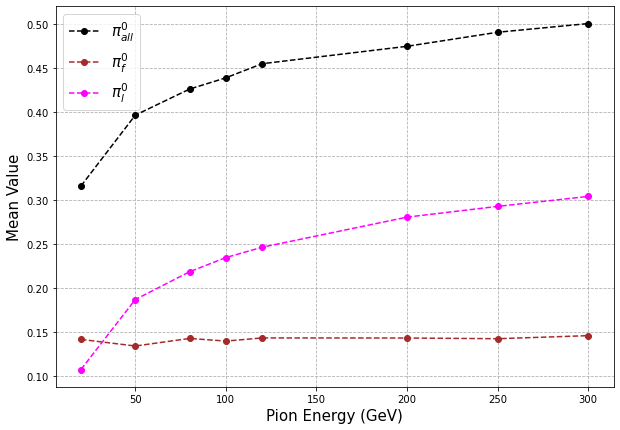

In [72]:
ene = [20, 50, 80, 100, 120, 200, 250, 300]

pi0_frac_all = []
pi0_frac_first = []
pi0_frac_late = []

for e in ene:
    pi0_frac_all.append(np.median(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values))
    pi0_frac_first.append(np.median(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values))
    pi0_frac_late.append(np.median(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values))
    
plt.figure(figsize=[10,7])

plt.plot(ene, pi0_frac_all, ".b", markersize=12, color="black", linestyle="--", label="$\pi^{0}_{all}$" )
plt.plot(ene, pi0_frac_first, ".b", markersize=12, color="brown",linestyle="--", label="$\pi^{0}_{f}$")
plt.plot(ene, pi0_frac_late, ".g", markersize=12, color="magenta", linestyle="--", label="$\pi^{0}_{l}$")

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Mean Value", fontsize=15)

plt.grid(linestyle="--")
plt.legend(fontsize=15)
#plt.xscale("log")

In [76]:
c=ROOT.TCanvas()

bins=150
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","; #pi^{0}_{f};#pi^{0}_{l}", bins,xmin,xmax, bins,xmin,xmax)

e=20


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
y = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()

H_pion.SetStats(0)

c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_l_vs_pi0_f_20GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_l_vs_pi0_f_20GeV.pdf has been created


In [79]:
c=ROOT.TCanvas()

bins=150
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","; #pi^{0}_{f};#pi^{0}_{l}", bins,xmin,xmax, bins,xmin,xmax)

e=100


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
y = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
                   
                   
H_pion.Draw("COLZ")


H_pion.SetStats(0)
#ROOT.gPad.SetLogy()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_l_vs_pi0_f_100GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_l_vs_pi0_f_100GeV.pdf has been created


In [80]:
c=ROOT.TCanvas()

bins=150
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","; #pi^{0}_{f};#pi^{0}_{l}", bins,xmin,xmax, bins,xmin,xmax)

e=300


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
y = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()

H_pion.SetStats(0)
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_l_vs_pi0_f_300GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/pion_shower_studies/pi0_l_vs_pi0_f_300GeV.pdf has been created
